# Basic Implementation of Marvin

Preliminary Code

In [159]:
# Import libraries
import numpy as np
import marvin
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
from marvin import config
config.access

'public'

In [3]:
config.setDR('DR17')
config.release

'DR17'

Code taken from GitHub Issues page to fix API error

In [4]:
from marvin import config
config.switchSasUrl(sasmode='mirror')

# Demo (MaNGA ID: 8485-1901)

In [5]:
from marvin.tools import Maps

# Load in map
maps = Maps('8485-1901')

# List all possible applications of maps
maps.datamodel

[<Property 'spx_skycoo', channel='on_sky_x', release='3.1.0', unit='arcsec'>,
 <Property 'spx_skycoo', channel='on_sky_y', release='3.1.0', unit='arcsec'>,
 <Property 'spx_ellcoo', channel='elliptical_radius', release='3.1.0', unit='arcsec'>,
 <Property 'spx_ellcoo', channel='r_re', release='3.1.0', unit=''>,
 <Property 'spx_ellcoo', channel='r_h_kpc', release='3.1.0', unit='kpc / h'>,
 <Property 'spx_ellcoo', channel='elliptical_azimuth', release='3.1.0', unit='deg'>,
 <Property 'spx_mflux', channel='None', release='3.1.0', unit='1e-17 erg / (cm2 s spaxel)'>,
 <Property 'spx_snr', channel='None', release='3.1.0', unit=''>,
 <Property 'binid', channel='binned_spectra', release='3.1.0', unit=''>,
 <Property 'binid', channel='stellar_continua', release='3.1.0', unit=''>,
 <Property 'binid', channel='em_line_moments', release='3.1.0', unit=''>,
 <Property 'binid', channel='em_line_models', release='3.1.0', unit=''>,
 <Property 'binid', channel='spectral_indices', release='3.1.0', unit=''>

###  H$\alpha$ emmission map

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:title={'center':'Emission line Gaussian flux: H-alpha 6564'}, xlabel='spaxel', ylabel='spaxel'>)

[WARNING]: Warning: converting a masked element to nan. (UserWarning)


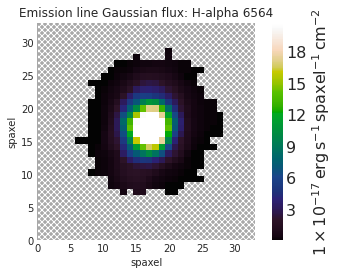

In [6]:
maps = Maps('8485-1901')

ha = maps.emline_gflux_ha_6564
ha.plot()

### Stellar Velocity Map

[WARNING]: Warning: converting a masked element to nan. (UserWarning)


Max stellar velocity:  66.77787  km/s
Min stellar velocity:  -347.21805  km/s


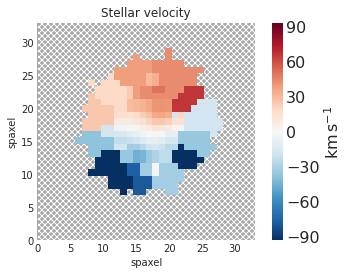

In [21]:
maps = Maps('8485-1901')

# Select and plot stellar velocity
sv = maps.stellar_vel
sv.plot()

# Find maximum and minimum value of stellar velocity
print("Max stellar velocity: ", np.max(sv.value), " km/s")
print("Min stellar velocity: ", np.min(sv.value), " km/s")

### Gas Velocity Map (H$\alpha$)

[WARNING]: Warning: converting a masked element to nan. (UserWarning)


gv shape:  (34, 34)
gv max:  141.33418
gv from stack:  83.72089
gv from direct slice:  83.72089
Max gas velocity:  141.33418  km/s
Min gas velocity:  -240.45087  km/s


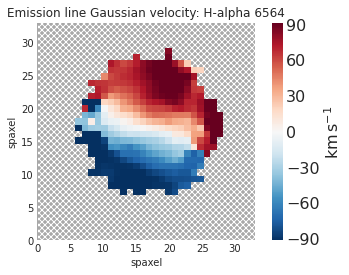

In [81]:
maps = Maps('8485-1901')

# Select and plot gas velocity
gv = maps.emline_gvel_ha_6564  # Gas velocity of H-alpha
gv.plot()

print("gv shape: ", np.shape(gv.value))
print("gv max: ", np.max(gv.value))

# Find spaxel elements where gv > 0
pos = np.where(gv.value > 0)

# Stack to obtain each spaxel position where condition applies
stack = np.column_stack((pos[0], pos[1]))
# print("stack: ", stack)

# Use stacked values to obtain gv at each point
print("gv from stack: ", gv.value[stack[0, 0], stack[0, 1]])
print("gv from direct slice: ", gv.value[13, 26])

# Find maximum and minimum value of gas velocity
print("Max gas velocity: ", np.max(gv.value), " km/s")
print("Min gas velocity: ", np.min(gv.value), " km/s")

### Normalised Stellar and Gas Velocity Maps

Use ``` np.maximum ```  and ```np.minimum``` to normalise positive and negative elements of array respectively then add together for total normalisation

In [121]:
z = np.arange(-10, 6)
print("z: ", z)

# Place positive and negative element of z into different arrays (of the same length)
z_pos = np.maximum(0, z)
z_neg = np.minimum(0, z)

# Normalise each array
z_pos_norm = z_pos/np.max(z_pos)
z_neg_norm = z_neg/np.abs(np.min(z_neg))  # Take absolute value of negative normalisation so values stay negative

# Combine to produce total normalised array
z_norm = z_pos_norm + z_neg_norm
print("z_norm: ", z_norm)

z:  [-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5]
z_norm:  [-1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.2  0.4  0.6
  0.8  1. ]


Note how ```z``` ranges from -10 to 5 and ```z_norm``` ranges from -1 to 1

Apply concept to stellar and gas velocity 

[WARNING]: Warning: converting a masked element to nan. (UserWarning)


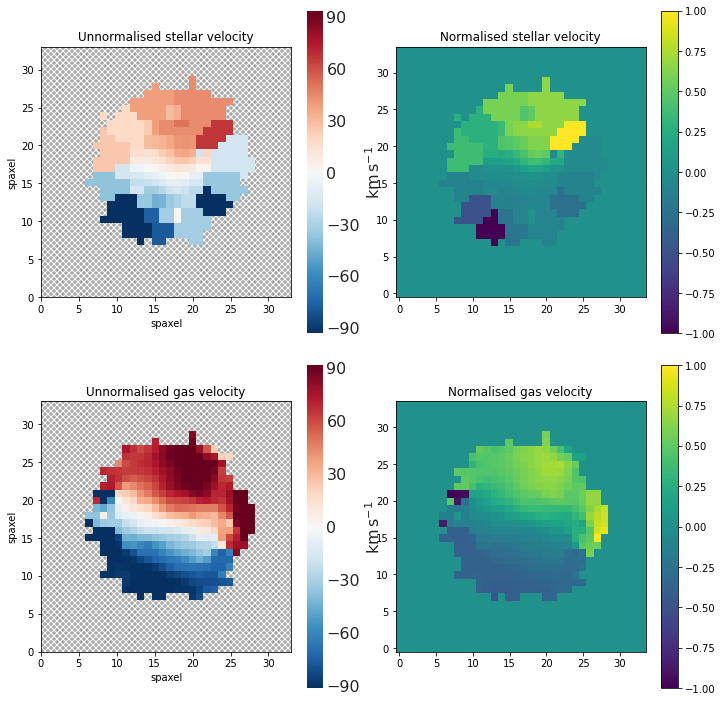

In [158]:
# Stellar velocity
sv_pos = np.maximum(0, sv.value)
sv_neg = np.minimum(0, sv.value)

sv_pos_norm = sv_pos / np.max(sv_pos)
sv_neg_norm = sv_neg / np.abs(np.min(sv_neg))

sv_norm = sv_pos_norm + sv_neg_norm

# Gas velocity
gv_pos = np.maximum(0, gv.value)
gv_neg = np.minimum(0, gv.value)

gv_pos_norm = gv_pos / np.max(gv_pos)
gv_neg_norm = gv_neg / np.abs(np.min(gv_neg))

gv_norm = gv_pos_norm + gv_neg_norm

# Create figure (& extra plotting code)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.tight_layout()

# Plot unnormalised velocities
sv.plot(fig=fig, ax=ax[0, 0], title="Unnormalised stellar velocity")
gv.plot(fig=fig, ax=ax[1, 0], title="Unnormalised gas velocity")

# Create x and y co-ords for normalised plots
num_xy = np.size(maps.spx_skycoo_on_sky_x[0])
x = np.arange(num_xy)
y = np.arange(num_xy)

# Plot normalised stellar velocity
sv_pcolormesh = ax[0, 1].pcolormesh(x, y, sv_norm, shading="auto")
ax[0, 1].set_title("Normalised stellar velocity")
ax[0, 1].set_aspect('equal')
fig.colorbar(sv_pcolormesh, ax=ax[0, 1])

# Plot normalised gas velocity
gv_pcolormesh = ax[1, 1].pcolormesh(x, y, gv_norm, shading="auto")
ax[1, 1].set_title("Normalised gas velocity")
ax[1, 1].set_aspect('equal')
fig.colorbar(gv_pcolormesh, ax=ax[1, 1])

# Application to Smethurst et al., 2018 Sample

### Stellar Velocity Maps

[WARNING]: Warning: converting a masked element to nan. (UserWarning)


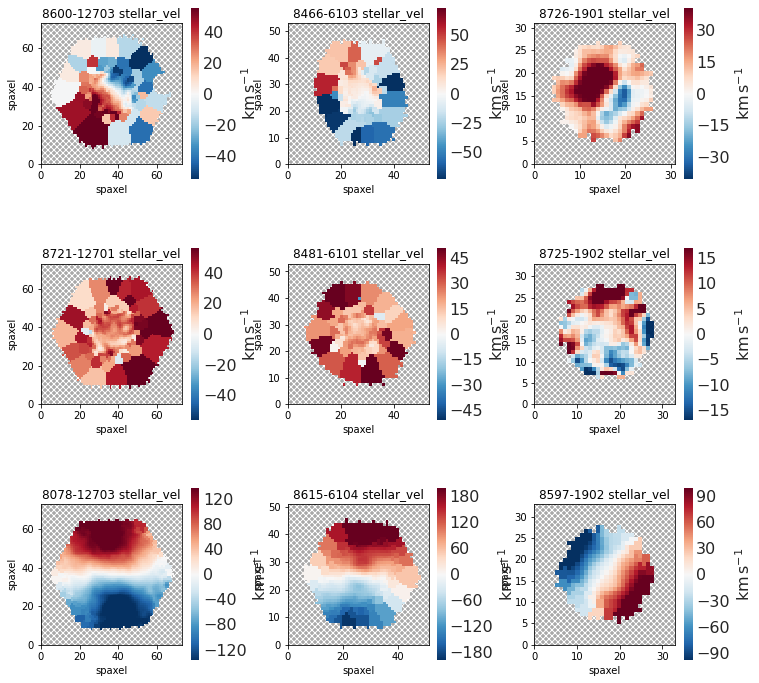

In [10]:
# Plot initial figure and axes
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

# MaNGA codes for each class of rotator
non_reg_ids = ['8600-12703', '8466-6103', '8726-1901']
slow_rot_ids = ['8721-12701', '8481-6101', '8725-1902']
fast_rot_ids = ['8078-12703', '8615-6104', '8597-1902']

# Non-regular rotators
for i in range(len(non_reg_ids)):
    # Access map of ith galaxy
    maps = Maps(non_reg_ids[i])

    # Acess stellar velocity data using datamodel code
    sv = maps.stellar_vel

    # Plot along top row
    sv.plot(fig=fig, ax=ax[0, i], title=''.join((non_reg_ids[i], ' stellar_vel')))

# Slow rotators
for i in range(len(slow_rot_ids)):
    # Access map of ith galaxy
    maps = Maps(slow_rot_ids[i])

    # Acess stellar velocity data using datamodel code
    sv = maps.stellar_vel

    # Plot along top row
    sv.plot(fig=fig, ax=ax[1, i], title=''.join((slow_rot_ids[i], ' stellar_vel')))

# Fast rotators
for i in range(len(fast_rot_ids)):
    # Access map of ith galaxy
    maps = Maps(fast_rot_ids[i])

    # Acess stellar velocity data using datamodel code
    sv = maps.stellar_vel

    # Plot along top row
    sv.plot(fig=fig, ax=ax[2, i], title=''.join((fast_rot_ids[i], ' stellar_vel')))
    
plt.savefig("Smethurst_2018_Stellar_Velocities.jpg")
plt.subplots_adjust(wspace=0.4, hspace=0.4)

### Gas Velocity Maps (H$\alpha$)

[WARNING]: Warning: converting a masked element to nan. (UserWarning)


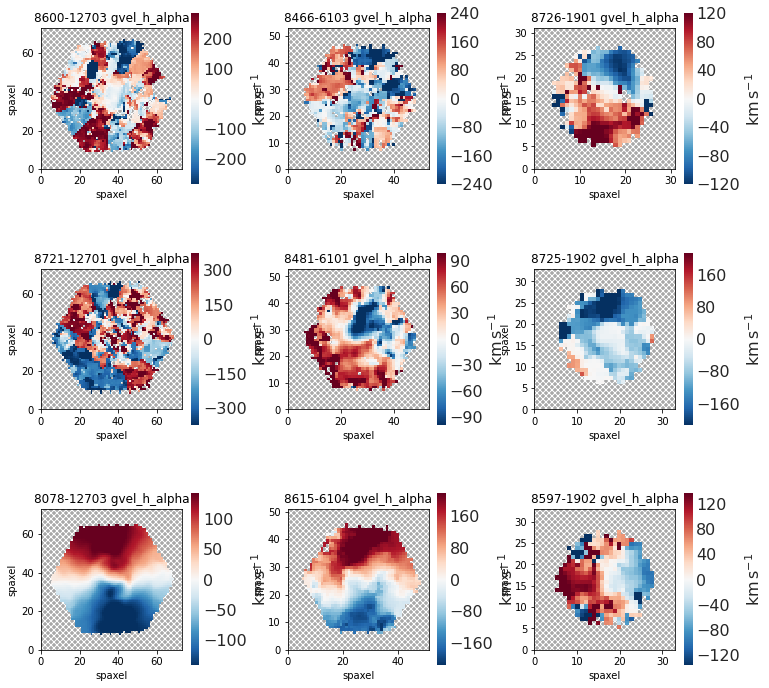

In [11]:
# Plot initial figure and axes
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

# MaNGA codes for each class of rotator
non_reg_ids = ['8600-12703', '8466-6103', '8726-1901']
slow_rot_ids = ['8721-12701', '8481-6101', '8725-1902']
fast_rot_ids = ['8078-12703', '8615-6104', '8597-1902']

# Non-regular rotators
for i in range(len(non_reg_ids)):
    # Access map of ith galaxy
    maps = Maps(non_reg_ids[i])

    # Acess stellar velocity data using datamodel code
    gv = maps.emline_gvel_ha_6564

    # Plot along top row
    gv.plot(fig=fig, ax=ax[0, i], title=''.join((non_reg_ids[i], ' gvel_h_alpha')))

# Slow rotators
for i in range(len(slow_rot_ids)):
    # Access map of ith galaxy
    maps = Maps(slow_rot_ids[i])

    # Acess stellar velocity data using datamodel code
    gv = maps.emline_gvel_ha_6564

    # Plot along top row
    gv.plot(fig=fig, ax=ax[1, i], title=''.join((slow_rot_ids[i], ' gvel_h_alpha')))

# Fast rotators
for i in range(len(fast_rot_ids)):
    # Access map of ith galaxy
    maps = Maps(fast_rot_ids[i])

    # Acess stellar velocity data using datamodel code
    gv = maps.emline_gvel_ha_6564

    # Plot along top row
    gv.plot(fig=fig, ax=ax[2, i], title=''.join((fast_rot_ids[i], ' gvel_h_alpha')))
    
plt.savefig("Smethurst_2018_Gas_Velocities.jpg")
plt.subplots_adjust(wspace=0.4, hspace=0.4)